# **AIN 212 - Project - FALL 2024**

**Student 1 Number** : 2230765051

**Name Surname**   : Gülse Atun

**Student 2 Number** : 2220765059

**Name Surname**   : Dinara Aliyeva

# **Necessary Imports**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    roc_auc_score
)


# **PART 1: Data Collection**

### **faoset Path:** "./FAO.csv"
We will deal with the "Food and Agriculture Organization" faoset. The faoset of the United Nations provides free access to food and agriculture fao for over 245 countries and territories, from the year 1961 to the most recent update. This faoset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.


### **Features:**
* Area Abbreviation: Country name abbreviation (categorical)
* Area Code: Country code
* Area: Country name (categorical)
* Item Code: Food item code
* Item: Food item (categorical)
* Element Code: Food or Feed code 
* Element: Food or Feed (categorical)
* Unit: Unit of measurement
* latitude: Latitude (numerical)
* longitude: Longitude (numerical)
* Y1961-Y2013: Production years (numerical)

### **Questions**

Global Trends:

* How has global food production changed over the years?
* What are the top-producing countries for key food commodities (e.g., wheat, rice, corn)?

In [2]:
fao = pd.read_csv("./FAO.csv", encoding='latin1')
print(fao.columns)
print(fao.head())

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG     

# **PART 2: Preprocessing and Cleaning**

Based on the data science question that you want to explore, preprocess the data according to the principles that we have discussed in class. You may need to do cleaning, if the data has significant amount of noise. Also, you may need to preprocess the textual data to create your own variables. Describe in detail all the data preprocessing steps that you have done. Analyze your data and report your observations.

In [3]:

# Detecting null values
print(fao.isnull().sum())
# Select columns with yearly fao for imputation
year_columns = [col for col in fao.columns if col.startswith('Y')]
# Create "Region_type" column to adress the data science question 
region_mean_production = fao.groupby('Area')[year_columns].mean().mean(axis=1)
threshold = region_mean_production.median()
fao['Region_Type'] = fao['Area'].map(
    lambda x: 'High-Producing' if region_mean_production[x] > threshold else 'Low-Producing'
)
fao_copy = fao.copy()
fao['Yearly_Mean'] = fao[year_columns].mean(axis=1, skipna=True)

# Apply interpolation within each 'Area' and 'Item' group
for col in year_columns:
    fao[col] = fao[col].fillna(fao['Yearly_Mean'])


non_year_columns = [col for col in fao.columns if col not in year_columns]

# Function to detect and replace outliers in a row (year columns only)
def outliers(row, threshold=3):
    # Calculate Z-scores for the row (ignoring NaNs)
    z_scores = zscore(row, nan_policy='omit')
    
    # Identify outlier indices
    outlier_indices = abs(z_scores) > threshold
    
    # Replace outliers with the mean of non-outlier values in the row
    row[outlier_indices] = row[~outlier_indices].mean(skipna=True)
    
    return row

# Apply the function only to the year columns
fao[year_columns] = fao[year_columns].apply(
    lambda row: outliers(row), axis=1
)

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64


# **PART 3: Data Exploration and Analysis**

In this step, you should explore data, present some of the critical statistics about the data that has been collected and preprocessed. At this step, you should also carry out clustering analysis on the data as well. The results of data analysis step must be presented via visualization and the results of clustering should be discussed in detail.

**3.1. Understanding the Data**
 - Summarize the dataset:
 - Shape (number of rows and columns)
 - Data types of each column
 - Sample records (e.g., the first 5–10 rows)

In [ ]:
# 3.1.1 Shape of the dataset
shape = fao.shape
print(shape)
"""The dataset contains 21,477 rows and 64 columns."""


# 3.1.2 Data types of each column
data_types = fao.dtypes
print(data_types)
"""The data contains these data types: int64, object, float64"""


# 3.1.3 Sample records
sample_records = fao.head(10)
print(sample_records)

**3.2. Descriptive Statistics**
 - Key metrics such as:
 - Mean, median, and standard deviation for numerical columns
 - Frequency counts for categorical columns

In [21]:
# 2.1 Key metrics for numerical columns: Mean, Median, Standard Deviation
numerical_stats = fao[year_columns].agg(['mean', 'median', 'std'])
print("Numerical Descriptive Statistics:\n")
print(numerical_stats)

# 2.2 Frequency counts for categorical columns
categorical_cols = fao.select_dtypes(include=['object']).columns
catgorical_frequency = {col: fao[col].value_counts() for col in categorical_cols}

# Display frequency counts for categorical columns
print("\n\nCategorical Frequency Counts:\n")
for col, freq in catgorical_frequency.items():
    print(f"\nColumn: {col}")
    print(freq)

Numerical Descriptive Statistics:

              Y1961        Y1962        Y1963        Y1964        Y1965  \
mean     205.379137   209.292256   213.344357   217.224424   223.541795   
median     1.904762     2.000000     2.000000     2.000000     2.000000   
std     1791.238598  1805.553058  1785.708149  1786.501387  1920.113946   

              Y1966        Y1967        Y1968        Y1969        Y1970  ...  \
mean     230.672513   234.403728   241.053037   246.098366   251.044258  ...   
median     2.000000     2.000000     2.000000     2.000000     2.000000  ...   
std     1995.041060  2023.223907  2073.305209  2142.056750  2191.594487  ...   

              Y2004        Y2005        Y2006        Y2007        Y2008  \
mean     481.562148   487.792515   495.101430   507.332091   520.933928   
median     6.000000     6.000000     7.000000     7.000000     7.000000   
std     4961.836827  5059.298070  5122.409591  5286.541521  5483.599822   

              Y2009        Y2010        Y2

**Numerical Data Analysis**

Yearly Metrics:

Mean:
Average production values steadily increase from 1966 (230.67) to 2013 (558.74), indicating overall growth in production over time.

Median:
The median values remain consistently low (2 to 7) across all years, suggesting a high skew in the data with many regions having minimal production and a few regions contributing disproportionately.

Standard Deviation:
The standard deviation values are significantly large, starting at 1995.04 in 1966 and increasing to 6206.91 in 2013. This highlights substantial variability in production levels across regions and items.

Trends Over Time:

There is a clear upward trend in average production over the years, coupled with increasing variability. This suggests that while production has generally risen, disparities between high- and low-producing regions have also widened.

**Categorical Data Analysis**

Area Abbreviation: The dataset covers 169 unique regions, with CHN (China) appearing most frequently (541 entries). This reflects China's prominence in global production data.

Area: A total of 174 unique country/region names are included, with Spain (150 entries) and Italy (148 entries) among the most frequently listed.

Item: 115 unique items are covered, with Milk - Excluding Butter having the highest frequency (558 entries). Other significant items include Eggs, Cereals - Excluding Beer, and Fish, Seafood.

Element: The dataset includes two main elements: Food (17,528 entries) and Feed (3,949 entries). Food dominates, reflecting the dataset's focus on consumable production.

Unit: All measurements are reported in 1000 tonnes, ensuring consistency across the dataset.

Region_Type: Regions are categorized as High-Producing (11,270 entries) and Low-Producing (10,207 entries), indicating a fairly balanced distribution between high and low output regions.


Growth and Variability: The steady increase in mean production values over time is encouraging, but the growing standard deviation underscores widening gaps in production levels among regions.

Highly Skewed Data: Low median values compared to the mean suggest the presence of extreme outliers or a small number of regions/items contributing disproportionately to production.

Categorical Insights: The dominance of specific items (Milk, Eggs) and regions (China, Spain) highlights areas of focus in global production.
Balanced Regional Representation:

The near-equal representation of High-Producing and Low-Producing regions provides a good foundation for comparative analysis.


In [18]:








# 3. Handling Missing Data
# - Analyze missing data patterns:
#   - Percentage of missing values per column
#   - Visualizations like heatmaps or bar plots to show missingness

# 4. Outlier Detection
# - Use box plots or histograms to identify outliers.
# - Statistical methods:
#   - Z-score analysis
#   - Interquartile range (IQR)

# 5. Relationships in Data
# - Correlation matrix for numerical variables.
# - Pivot tables or cross-tabulations for categorical data.
# - Pairwise scatterplots to visualize relationships.

# 6. Data Visualization
# - Histograms, bar charts, or pie charts for distributions.
# - Line plots for trends.
# - Boxplots for distributions and outliers.

# 7. Key Insights
# - Summarize the key findings from your exploration phase:
#   - Patterns
#   - Anomalies
#   - Questions that arise for further analysis


(21477, 65)
Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2011                float64
Y2012                float64
Y2013                float64
Region_Type           object
Yearly_Mean          float64
Length: 65, dtype: object
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   
5               AFG          2  Afghanistan       2514   
6               AFG          2  Afghanistan       2517   
7               AFG          2  Afghanistan       2520   
8               AFG          2  Afghanistan       2531   
9               AFG          2  Afghanistan       2536   

    

'\nArea Abbreviation: 169 unique values with CHN having the most entries.\nArea: 174 unique values with Spain having the most entries.\nItem: 115 unique items, with Milk - Excluding Butter having the most entries.\nElement: Two distinct values (Food and Feed), with Food being the majority.\nUnit: Only one unique value (1000 tonnes).\n'

# **PART 4: Predictive Modelling**

**Goal**: In this step, you should carry on classification based on what you want to predict from the data. You should apply at least three classification algorithms that we have talked about in class and compare their performance. You should clearly state which algorithms that you try and why. You should properly setup your training environment, ie. setup your training, validation and test sets. You should also comment on the parameter selection procedures and analyse the performance based on the parameters.

**Answer**: The goal is to predict the amount of food item produced in year 2013. Algorithms for application:
1. Linear Regression
    Baseline Model. Fast to train and evaluate. Comparing its performance with more advanced models helps to inderstand whether the problem required something more complex.
    **Why it might perform well**:
    If the production trends from previous years have a linear relationship with 2013 production, Linear Regression can perform well. 
    ***Choosing features for prediction:***
    Past production values are crucial for predicting production in upcoming years. Use recent years to focus on most relevant trends.
    Latitude and longtitude can capture climate and regional factors affecting production. 
2. Support Vector Regressor
    Unlike the linear regression model, works well for non-linear relationships using different kernels.
    **Why it might perform well**:
    Handles non-linear relationships better than Linear Regression.
3. Random Forest
    Captures complex non-linear relationships well. Would ouperform all previously used models, if the perfomance is not sufficient.
    **Why it might perform well**
    Handles non-linear relationship and complex feature interactions effectively. Handles categorical variables well. Excellent choice for the dataset, it adapts to complex trends in production data.


In [4]:
# 1. Defining the problem and type of model: 
# - Predicting the amount of food item produced in 1000 tones in year 2013
#   - Linear Regression
#   - Support Vector Regressor
#   - Random Forest Regressor

# 2. Split the Data
# define features and target
X = fao[['Area Code', 'Item Code',
       'Element Code', 'latitude', 'longitude', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012']]
y = fao['Y2013']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# 3. Train the Model
# - Fit the model to the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# 4. Make prediction
y_pred_linear = linear_model.predict(X_test)

In [5]:
# Repeat for Support Vector Regressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf', C= 1.0, epsilon = 0.1)
# train the model
svr_model.fit(X_train_scaled, y_train)
y_pred_SVR = svr_model.predict(X_test_scaled)

In [6]:
# Repeat for Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=12)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [7]:
# summary table of performance metrics
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

linear_metrics = evaluate_regression(y_test, y_pred_linear)
svr_metrics = evaluate_regression(y_test, y_pred_SVR)
forest_metrics = evaluate_regression(y_test, y_pred_rf)

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 'Random Forest'],
    'MAE': [linear_metrics[0], svr_metrics[0], forest_metrics[0]],
    'MSE': [linear_metrics[1], svr_metrics[1], forest_metrics[1]],
    'R² Score': [linear_metrics[2], svr_metrics[2], forest_metrics[2]]
})
print(metrics_df)

                      Model         MAE           MSE  R² Score
0         Linear Regression   43.882305  4.785313e+04  0.997924
1  Support Vector Regressor  497.549189  2.313241e+07 -0.003351
2             Random Forest   40.055080  2.949090e+05  0.987209


**Goal 2:** Classifying countries as "High-Producing" or "Low-Producing" to identify and predict top producers in the upcoming years.

**Answer**  Consider following models:
1. Logistic regression. Used as a baseline model. Might work the best, as it is expected that the values would have linear relationship.
2. Random Forest. More complex model to capture more complex relationships
3. SVM. Effective for non-linear relationaship.

In [8]:
X = fao[['Area Code','Item Code', 'Element Code', 'latitude', 'longitude', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012']]
y = fao['Region_Type']
# encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)


In [9]:
# train logistic regression
logistic_model = LogisticRegression(max_iter=1000, random_state=12)
logistic_model.fit(X_train, y_train)
# predict on validation set
y_val_pred_logistic = logistic_model.predict(X_val)

print("Logistic Regression Performance:")
print(classification_report(y_val, y_val_pred_logistic))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2245
           1       0.70      0.69      0.69      2050

    accuracy                           0.71      4295
   macro avg       0.71      0.71      0.71      4295
weighted avg       0.71      0.71      0.71      4295



In [10]:
# SVM with RBF
svc_model = SVC(kernel='rbf', random_state=12)
svc_model.fit(X_train, y_train)
y_val_pred_svc = svc_model.predict(X_val)

print("SVM Performance:")
print(classification_report(y_val, y_val_pred_svc))

SVM Performance:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2245
           1       0.73      0.69      0.71      2050

    accuracy                           0.73      4295
   macro avg       0.73      0.73      0.73      4295
weighted avg       0.73      0.73      0.73      4295



In [11]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)

rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)

print("Random Forest Performance:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2245
           1       1.00      0.99      0.99      2050

    accuracy                           0.99      4295
   macro avg       0.99      0.99      0.99      4295
weighted avg       0.99      0.99      0.99      4295



### Parameter tuning for classification models:
Notes: 
1. Random Forest seemed to perform the best, after the SVM classification model. Attempting to increase performance by tuning the parameters of both.
2. Using smaller subset for tuning, since the dataset is too big for faster iteration.

In [12]:
# sample 10% of the training dataset for parameter tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=12)


In [13]:
# parameter tuning for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [14]:
# parameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1],
}
grid_search = GridSearchCV(SVC(random_state=12), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [15]:
# parameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=12), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **PART 5: Model Evaluation and Visualization**

In this last step of the data science cycle, you should evaluate your classification model based on various different evaluation metrics. In addition, you should provide visualizations on the performance of your algorithm (such as confusion matrices, ROC curves, PR curves, etc.).


In [16]:
# fit the models with the new parameters after tuning
# {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'
best_logistic_model = LogisticRegression(
    penalty='l1',
    C=100,
    solver='liblinear',
    max_iter=10000,
    random_state=12
)
best_logistic_model.fit(X_train, y_train)
y_val_pred_logistic = best_logistic_model.predict(X_val)

# SVM with best parameters
# {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best_svc_model = SVC(
    C=10,                  
    kernel='rbf',        
    gamma=1,             
    probability=True,     
    random_state=12
)
best_svc_model.fit(X_train, y_train)

# Validate predictions
y_val_pred_svc = best_svc_model.predict(X_val)

# Random Forest with best parameters
# {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth= None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=12
)
best_rf_model.fit(X_train, y_train)

y_val_pred_rf = best_rf_model.predict(X_val)

### Evaluation Metrics Used
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. AUC-ROC Score

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2245
           1       0.69      0.69      0.69      2050

    accuracy                           0.71      4295
   macro avg       0.71      0.71      0.71      4295
weighted avg       0.71      0.71      0.71      4295



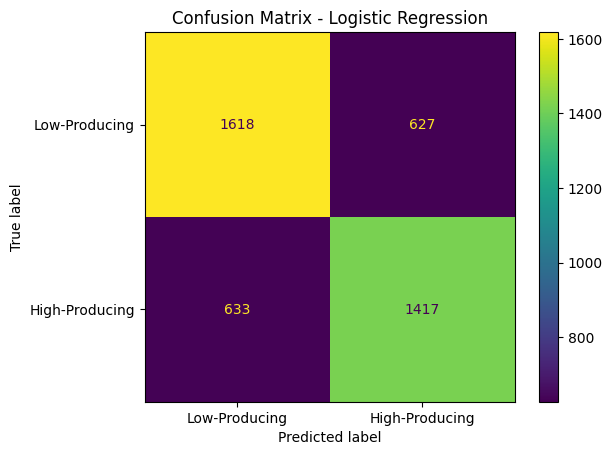

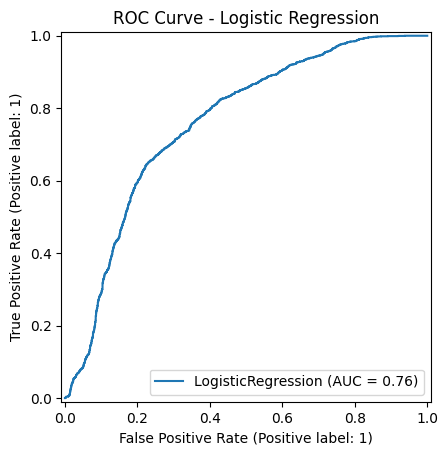

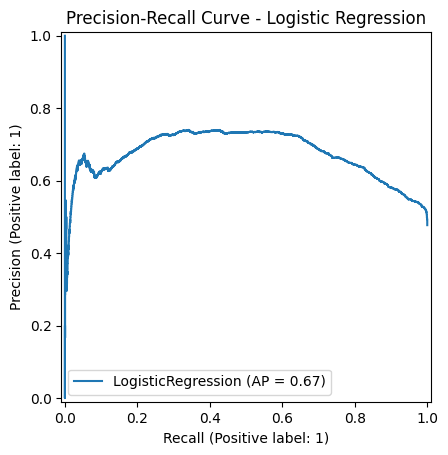

SVM Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2245
           1       0.98      0.92      0.95      2050

    accuracy                           0.95      4295
   macro avg       0.95      0.95      0.95      4295
weighted avg       0.95      0.95      0.95      4295



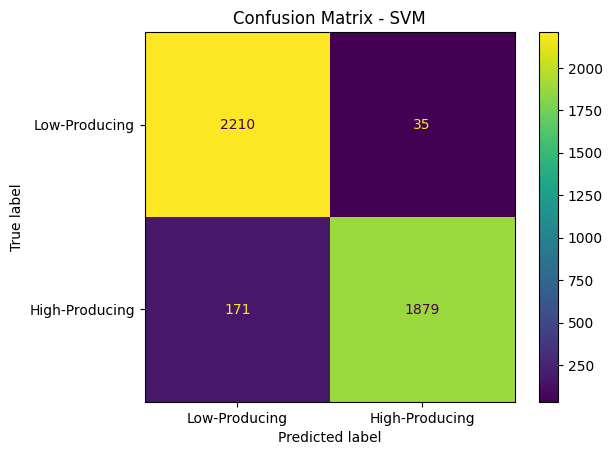

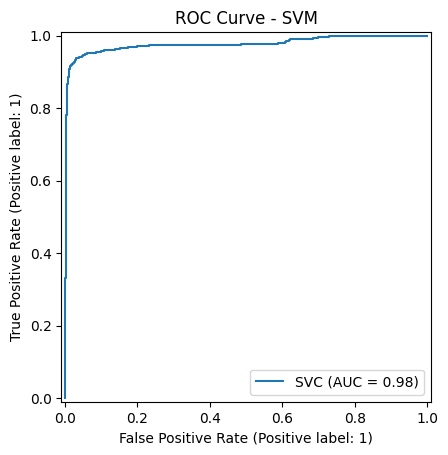

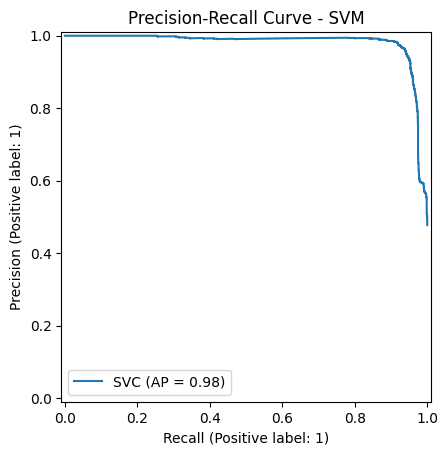

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2245
           1       1.00      0.99      0.99      2050

    accuracy                           0.99      4295
   macro avg       0.99      0.99      0.99      4295
weighted avg       0.99      0.99      0.99      4295



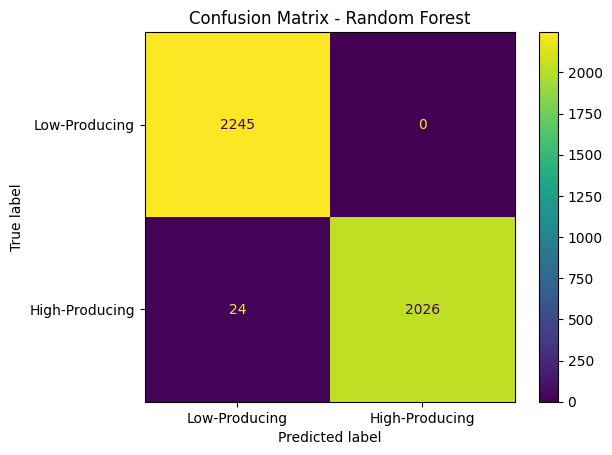

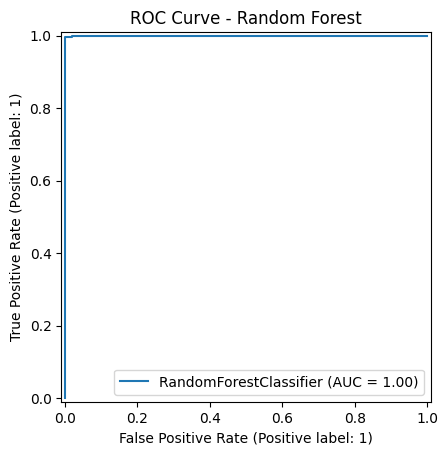

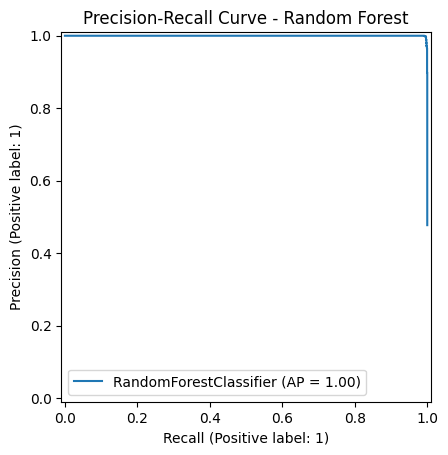

In [17]:
# Logistic Regression Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_val, y_val_pred_logistic))
ConfusionMatrixDisplay.from_estimator(best_logistic_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
if len(set(y_val)) == 2: 
    RocCurveDisplay.from_estimator(best_logistic_model, X_val, y_val)
    plt.title("ROC Curve - Logistic Regression")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_logistic_model, X_val, y_val)
    plt.title("Precision-Recall Curve - Logistic Regression")
    plt.show()

# SVM Evaluation
print("SVM Performance:")
print(classification_report(y_val, y_val_pred_svc))
ConfusionMatrixDisplay.from_estimator(best_svc_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - SVM")
plt.show()
if len(set(y_val)) == 2:  
    RocCurveDisplay.from_estimator(best_svc_model, X_val, y_val)
    plt.title("ROC Curve - SVM")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_svc_model, X_val, y_val)
    plt.title("Precision-Recall Curve - SVM")
    plt.show()

# Random Forest Evaluation
print("Random Forest Performance:")
print(classification_report(y_val, y_val_pred_rf))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - Random Forest")
plt.show()
if len(set(y_val)) == 2:  
    RocCurveDisplay.from_estimator(best_rf_model, X_val, y_val)
    plt.title("ROC Curve - Random Forest")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_rf_model, X_val, y_val)
    plt.title("Precision-Recall Curve - Random Forest")
    plt.show()


### Analysis and Observation of the performance of the Classification Models
#### Random Forest:
##### The model showed exceptional performance, with no false positives and minimal false negatives. It correctly identified nearly all high-producing and low-producing regions.
#### Support Vector Machine (SVM)
##### After the parameter tuning the model started performing significatly better as expected, since the SVM models are usually sensitive to the parameter tuning. SVM struggled slightly more with false negatives (168 cases) and false positives (35 cases) compared to Random Forest. However, it remained a strong performer overall.
#### Logistic Regression. 
##### Logistic Regression underperformed compared to the other models. Logistic Regression misclassified a significant number of cases, as evidenced by 632 false positives and 638 false negatives. This suggests that the model struggled to distinguish between high-producing and low-producing regions.

### Conclusion:
#### Best Model: The Random Forest model outperformed both SVM and Logistic Regression, achieving the highest accuracy, precision, recall, and F1-score. It is the most reliable model for classifying regions as high-producing or low-producing.